## Séries temporais - Introdução
https://builtin.com/data-science/time-series-python

Forecasting de séries temporais é, basicamente, modelamento por machine learning para dados de séries temporais para prever valores futuros

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# carregando os dados
data = pd.read_csv("datasets/airpassengers.csv")
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Os dados contém o número de passageiros viajando em um determinado mÊs. O tipo de dado é um objeto que será convertido em um timeseries e será usado como index

In [8]:
from datetime import datetime

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace = True)

In [12]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [13]:
ts = data['Passengers']

In [14]:
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [23]:
# Quantidade de passageiros por mês em 1957
ts['1957']

Month
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
1957-05-01    355
1957-06-01    422
1957-07-01    465
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
Name: Passengers, dtype: int64

### Estacionaridade

é um conceito muito importante em Análise de Séries Temporais. Para aplicar um modelo de séries temporais, é importante que a série temporal deve ser estacionário; em outras palavras, média e variância devem ser constantes ao longo do tempo. Isso é feito basicamente porque se você pegar um certo comportamento em relação ao tempo, é importante que este comportamento é o mesmo no futuro. Na prática, assumimos que as séries é estacionária caso as propriedades estatística sejam constantes ao longo do tempo.

In [66]:
rolling_mean = ts.rolling(12).mean()
rolling_std = ts.rolling(12).std()

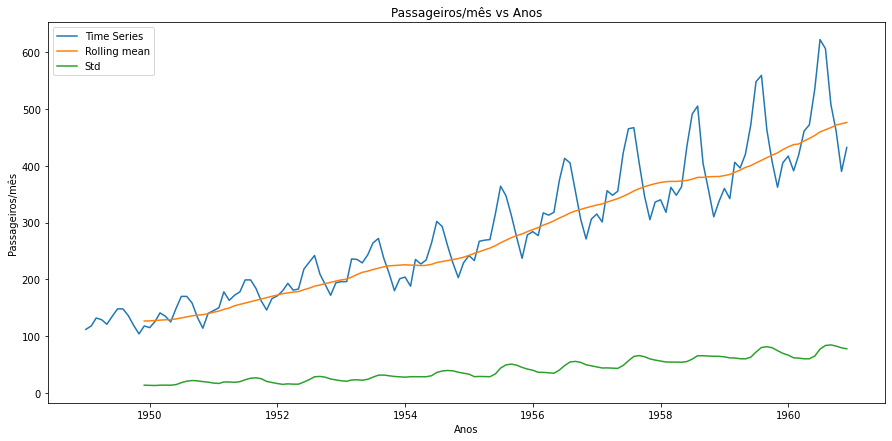

In [67]:
# Time series
plt.figure(figsize=(15,7))
plt.plot(ts, label = "Time Series")
plt.plot(rolling_mean, label = "Rolling mean")
plt.plot(rolling_std, label = "Std")
plt.title("Passageiros/mês vs Anos")
plt.legend(loc='best')
plt.xlabel("Anos")
plt.ylabel("Passageiros/mês")
plt.show()

Pode ver que o gráfico tem um tendência de crescimento ao longo do tempo, com alguma sazonalidade.

**Dickey-Fuller test**: Um teste estatístico para verificação de sazonalidade. Consideramos a hipótese nula: 'A série temporal é não-estacionária'. A ideia é ter o teste estatístico menor que o valor crítico, neste caso, podemos rejeitar a hipótese nula e dizer que a série temporal é estacionária. (rejeitar se p-value > 0.05)

### Fazendo a série temporal estacionária

Existe dois fatores majoritários para que uma série não seja estacionária
- Tendência: média não-constante
- Sazonalidade: Variação em intervalos específicos

A ideia básica é modelar a tendência e a sazonalidade nesta série, para que podemos removê-los e fazer a série estacionária. Depois, podemos aplicar forecasting nas séries estacionárias. E, finalmente, podemos converter valores preditos para o original por reaplicação da tendência e sazonalidade.

#### Tendência

O primeiro passo é reduzir a tendência por transformação. Essa transformação pode ser log, sqrt, etc. Basicamente, penaliza valores grandes mais que pequenos.

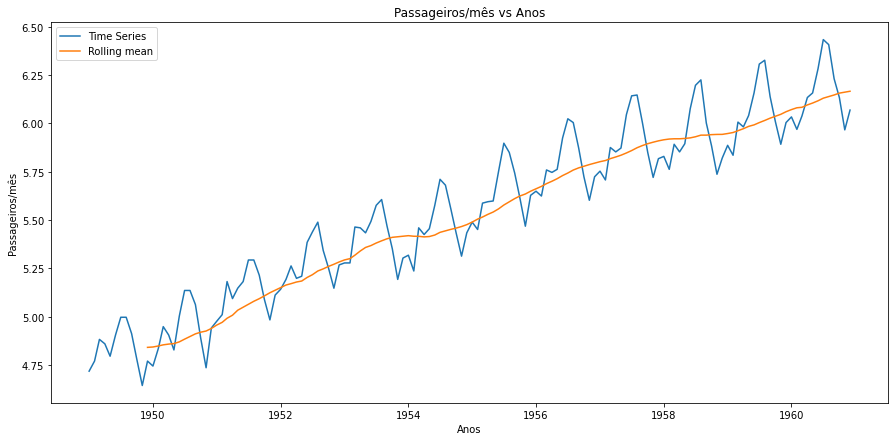

In [71]:
# Log Time series
plt.figure(figsize=(15,7))
plt.plot(np.log(ts), label = "Time Series")
plt.plot(np.log(rolling_mean), label = "Rolling mean")
plt.title("Passageiros/mês vs Anos")
plt.legend(loc='best')
plt.xlabel("Anos")
plt.ylabel("Passageiros/mês")
plt.show()

Existe algum reuído na tendência. Existe alguns métodos para remover esses ruídos:
- Smoothing: usar média móvel
- Aggression: tirar a média de um certo período de tempo (year/month)

<Figure size 1080x504 with 0 Axes>

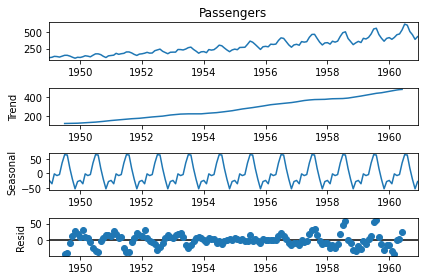

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize = (15,7))
decompose = seasonal_decompose(data['Passengers'],model='additive', period=12)
decompose.plot()
plt.show()